<a href="https://colab.research.google.com/github/kjungmo/SBA2020_FinalProject/blob/main/traffic_sign_(%EC%9E%91%EC%97%85%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# /content/drive/My Drive/lane/traffic_signs_classification.zip

path_to_zip_file = '/content/drive/My Drive/lane/traffic_sign_classification.zip'
directory_to_extract_to = '/content/trafficsign'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

In [ ]:
import cv2
import numpy as np
import glob
import random
from tqdm import tqdm
import os


# data_gen 코드 모듈을 제일 먼저 작성한다.


def traffic_data_gen(data_path, model_size):  # 데이터셋의 위치를 받고 모델사이즈를 받아서 모델에 넣을 데이터 생성

    label = 0
    data_set = []
    traffic_dict = []
    save_flag = 0
    count = 0

    train_data_path = "trafficdata/train/"
    test_data_path = "trafficdata/test/"
    traffic_name_txt = "traffic_name.txt"  # 나중에 파일 라벨 확인할 txt 문서 만들어 둔 것.(편의상)

    if not os.path.isdir(train_data_path):  # 해당 디렉토리에 없다면 만들어라
        os.makedirs(train_data_path)
    if not os.path.isdir(test_data_path):
        os.makedirs(test_data_path)

    if len(glob.glob(train_data_path + "*.jpg")) > 10:  # 훈련 데이터 경로의 이미지가 10개를 초과하면 save_flag= 1
        save_flag = 1  # 즉 이미 있으니 저장 안한다는 말. 읽어오기만 해도 된다.

    # 데이터가 없다면
    # 훈련 데이터 경로에 이미지가 없다면( 9개 이하라면)
    if save_flag == 0:

        fld_list = glob.glob(data_path + '/*')  # 폴더의 리스트를 가져온다. 데이터 경로의 모든 폴더들
        for i in tqdm(fld_list):  # 여기서 i는 폴더리스트에 있는 요소 하나다. 즉 폴더 하나가 라벨 하나다.
            img_list = i + '/*.jpg'  # img_list는 폴더리스트에 들어간 이미지들의 리스트경로를 가져오게 하는  값 설정
            img_list = glob.glob(img_list)  # 해당 리스트들을 모두 파일로 가져온다.
            for j in img_list:  # j는 폴더안의 이미지 하나 하나
                img = cv2.imread(j)  # 이미지를 읽어서
                # img = cv2.resize(img, (model_size, model_size))  # resize해주고
                traffic_name = i.replace('/content/trafficsign/traffic_signs_classification/myData', '~~')   # 폴더명별로 되어있는 라벨 이름만 남김.
                data_set.append([img, label])  # 이미지와 그에따른 라벨을 데이터셋에 추가한다.
            traffic_dict.append(traffic_name)  # 라벨 사전에는 j의 포문 후 라벨 이름을 추가한다.
            label += 1
#                 img_list 포문이 돌때마다 라벨별 폴더의 이미지를 읽어서 라벨링해준다.
#                     그에 맞는 라벨 이름도 라벨 사전에 추가된다.


        with open(traffic_name_txt, 'w') as txt:
            for n in traffic_dict:  # 라벨 사전에 적힌 이름들( 폴더명) 개수 만큼 돌면서
                txt.writelines(str(n))  # txt파일에 이름을 쭉 write한다.
                txt.writelines(" ")  # 한칸씩 띄어쓰면서
 
        indexer = int(len(data_set) * 0.8)  # 훈련/시험 데이터 나누는 비율

        x_train = []
        y_train = []
        x_test = []
        y_test = []

        random.shuffle(data_set)  # 전체 데이터 섞어줌

        count = 0
        for i in tqdm(range(0, indexer)):  # 훈련데이터
            x_train.append(data_set[i][0])
            y_train.append(data_set[i][1])  # 위에서 [img, label]로 append해서 이렇게 [i][0] , [i][1]

            save_img_path = train_data_path + "%d.jpg" % count  # 이미지 경로
            save_label_file = train_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

            cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장
            with open(save_label_file, 'w') as txt:  # 텍스트 저장 라벨링 한 숫자에 맞아떨어지게
                txt.writelines(str(data_set[i][1]))
            count += 1

        count = 0  # 시험 데이터도 돌려야 해서 local변수 선언 해준 것이다. 위의 count와 영향 없게
        for i in tqdm(range(indexer, len(data_set))):
            x_test.append(data_set[i][0])
            y_test.append(data_set[i][1])

            save_img_path = test_data_path + "%d.jpg" % count  # 이미지 경로
            save_label_file = test_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

            cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장

            with open(save_label_file, 'w') as txt:  # 텍스트 저장
                txt.writelines(str(data_set[i][1]))
            count += 1

        return x_train, y_train, x_test, y_test, traffic_dict

    elif save_flag == 1:  # 이미 파일이 준비되어 있는 경우

        x_train = []
        y_train = []
        x_test = []
        y_test = []

        train_data_list = glob.glob(train_data_path + "*.jpg")  # 데이터가 이미 존재하니까. 이미지 불러옴
        test_data_list = glob.glob(test_data_path + "*.jpg")


        for i in tqdm(range(0, len(train_data_list))):  # 이미지 하나하나 for문돌리면서
            file = train_data_list[i]  # i번째 이미지
            img = cv2.imread(file)  # 읽고
            label_path = file.replace(".jpg", ".txt")  # 라벨 데이터 읽기 위해 path만듬
            with open(label_path, 'r') as txt:  # 라벨 데이터 txt안에서 라벨 읽어옴
                label = txt.readlines()
            label = int(label[0])  # 각 이미지 별 라벨 값을 얻는다.
            x_train.append(img)  # 이미지는 x에
            y_train.append(label)  # 라벨은 y에 넣는다
        # 테스트 데이터도 마찬가지
        for i in tqdm(range(0, len(test_data_list))):
            file = test_data_list[i]
            img = cv2.imread(file)
            label_path = file.replace(".jpg", ".txt")
            with open(label_path, 'r') as txt:
                label = txt.readlines()
            label = int(label[0])
            x_test.append(img)
            y_test.append(label)
        # 라벨 이름을 불러오기 위해 만들어둔 딕셔너리에서 찾아오는 방법
        with open(traffic_name_txt, 'r') as txt:
            label = txt.readlines()
            traffic_dict = label[0].split("~~")  # 만든 파일이 모두 띄어쓰기로 이루어진것

        return x_train, y_train, x_test, y_test, traffic_dict

if __name__ == "__main__":
    data_path = "/content/trafficsign/traffic_signs_classification/myData"
    model_size = 32
    x_train, y_train, x_test, y_test, traffic_dict = traffic_data_gen(data_path, model_size)



100%|██████████| 14628/14628 [00:01<00:00, 9263.99it/s]


In [ ]:
traffic_dict

['~~/End of speed limit (80kmh)',
 '~~/Road work',
 '~~/Speed limit (100kmh)',
 '~~/Pedestrians',
 '~~/Vechiles over 3.5 metric tons prohibited',
 '~~/Right-of-way at the next intersection',
 '~~/End of all speed and passing limits',
 '~~/No passing',
 '~~/Speed limit (80kmh)',
 '~~/No passing for vechiles over 3.5 metric tons',
 '~~/Dangerous curve to the left',
 '~~/End of no passing',
 '~~/Speed limit (20kmh)',
 '~~/Stop',
 '~~/Beware of ice snow',
 '~~/Road narrows on the right',
 '~~/Children crossing',
 '~~/Go straight or left',
 '~~/Traffic signals',
 '~~/Yield',
 '~~/Dangerous curve to the right',
 '~~/Priority road',
 '~~/Speed limit (60kmh)',
 '~~/Turn right ahead',
 '~~/Speed limit (120kmh)',
 '~~/Roundabout mandatory',
 '~~/Keep right',
 '~~/Wild animals crossing',
 '~~/Turn left ahead',
 '~~/Bicycles crossing',
 '~~/Slippery road',
 '~~/Bumpy road',
 '~~/End of no passing by vechiles over 3.5 metric tons',
 '~~/No vechiles',
 '~~/Keep left',
 '~~/Speed limit (50kmh)',
 '~~

In [ ]:
y_train[:50]

[27,
 35,
 26,
 8,
 2,
 36,
 5,
 7,
 24,
 42,
 26,
 37,
 22,
 4,
 16,
 2,
 41,
 32,
 41,
 2,
 9,
 19,
 38,
 14,
 26,
 9,
 27,
 33,
 2,
 21,
 38,
 38,
 38,
 21,
 13,
 37,
 7,
 19,
 19,
 27,
 34,
 37,
 1,
 21,
 19,
 5,
 9,
 41,
 28,
 1]

In [ ]:
import keras
import cv2
import os
import datetime
import numpy as np
import glob
import random
from tqdm import tqdm


m_name = "traffic_1"
lr = 0.03
epochs=10
bath_size = 32


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
x_train = X_train / 255.0
x_test = X_test / 255.0

y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(3, kernel_size=3,padding="same")(inputs)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D()(x)


x = keras.layers.Conv2D(8, kernel_size=3,padding="same")(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D()(x)


x = keras.layers.Conv2D(16, kernel_size=3,padding="same")(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D()(x)


x = keras.layers.Conv2D(128, kernel_size=3,padding="same")(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D()(x)

x = keras.layers.Flatten()(x)
x= keras.layers.Dense(64)(x)
x = keras.layers.Activation("relu")(x)
x= keras.layers.Dense(43)(x)

out = keras.layers.Activation("softmax")(x)
model = keras.models.Model(inputs, out)

model.summary()

if not os.path.isdir('./saved_models'):
    os.makedirs('./saved_models')
if not os.path.isdir('./logs'):
    os.makedirs('./logs')

log_dir = os.path.join(
    "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])
callbacks = [keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                               patience=20,
                                               verbose=1, factor=0.5),
             keras.callbacks.ModelCheckpoint(filepath='./saved_models/'+m_name+'-{epoch:05d}.h5',
                                             verbose=1,
                                             period=5),
             keras.callbacks.TensorBoard(log_dir),
             keras.callbacks.EarlyStopping(monitor='loss', patience=25, verbose=1)]
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=bath_size, callbacks=callbacks, verbose=1)

scores = model.evaluate(x_test,y_test, verbose=2)
print("Acc:", scores[1]*100)
model.save('./saved_models/'+m_name+'_final.h5')

(58511, 32, 32, 3) (58511, 43) (14628, 32, 32, 3) (14628, 43)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 3)         84        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 3)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         224       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 8)         0         
__________________________________________________________

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
model = tf.keras.models.load_model('/content/saved_models/traffic_1_final.h5')
pred = np.argmax(model.predict(x_test[:5]), axis=1)
for i in range(len(pred)):
  img = x_test[i]
  real_name = traffic_dict[pred[i]]
  plt.title(real_name)
  plt.imshow(img[:, :, 0], 'gray')
  plt.show()
  # print(real_name)

In [ ]:
prpe = []
for i in range(0, 199):
  x_test_x = np.expand_dims(x_test[i], axis=0)
  
  pred_y = np.argmax(model.predict(x_test_x), axis=1)
  prpe.append(pred_y)
  
print(prpe)

[array([37]), array([38]), array([37]), array([5]), array([38]), array([27]), array([42]), array([26]), array([35]), array([9]), array([17]), array([35]), array([42]), array([7]), array([37]), array([38]), array([8]), array([19]), array([2]), array([38]), array([37]), array([38]), array([3]), array([40]), array([1]), array([22]), array([33]), array([31]), array([0]), array([1]), array([26]), array([26]), array([21]), array([38]), array([42]), array([5]), array([38]), array([36]), array([22]), array([9]), array([6]), array([26]), array([9]), array([36]), array([33]), array([21]), array([1]), array([2]), array([24]), array([41]), array([39]), array([27]), array([9]), array([6]), array([24]), array([24]), array([8]), array([21]), array([23]), array([7]), array([24]), array([9]), array([8]), array([28]), array([16]), array([5]), array([33]), array([36]), array([12]), array([17]), array([18]), array([41]), array([8]), array([36]), array([7]), array([38]), array([19]), array([35]), array([25

[37]
[38]
[37]
[5]
[38]
[27]
[42]
[26]
[35]
[9]


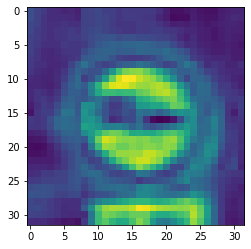

In [ ]:
import matplotlib.pyplot as plt


# model.load_weights("/content/saved_models/traffic_1_final.h5")

for i in range(0,len(x_test[:10])):
    img = x_test[i]
    # img_copy = img.copy()
    # plt.imshow(img_copy)
    # plt.show()
    label = y_test[i]
    # print(label)
    img = np.expand_dims(img,axis=0)
    # img = img / 255.
    plt.imshow(img[0, :, :,0])
    # plt.show()
    eval = model.predict(img)
    # print(eval)
    eval = np.argmax(eval, axis=1)
    print(eval)
    # eval = traffic_dict[eval]
    # print(eval)


In [ ]:
print(y_test[:5])


for i in  y_test[:5]:
  eval = np.argmax(i) + 1
  print(eval)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
40
21
40
8
29
